In [10]:
import json
import numpy as np
import h5py
import matplotlib.pyplot as plt
import os

In [2]:
with open("data02/database/database_lite.json", "r") as f:
    m_idx = json.load(f)
    m_imgs = np.array(m_idx["im_paths"])
    m_loc = np.array(m_idx["loc"])

# query
with open("data02/query/query_lite.json", "r") as f:
    q_idx = json.load(f)
    q_imgs = np.array(q_idx["im_paths"])
    q_loc = np.array(q_idx["loc"])

with h5py.File("data02/london_lite_gt.h5", "r") as f:
    fovs = f["fov"][:]
    sim = f["sim"][:].astype(np.uint8)

In [30]:
np.where(sim[100, :] == 1)[0]

array([ 99, 100, 101, 102, 103, 104, 105], dtype=int64)

In [50]:
new_sim = np.zeros(sim.shape)
for q in range(sim.shape[0]):
    rel = np.where(sim[q, :] == 1)[0]

    for r in rel:
        q_l = q_loc[q]
        r_l = m_loc[r]

        dist = np.linalg.norm(q_l - r_l)

        if dist < 10:
            new_sim[q, r] = 1

np.sum(new_sim)

446.0

In [61]:
with open('new_sim_10m.npy', 'wb') as f:
    np.save(f, new_sim)

In [55]:
for i in range(500):
    if len(np.where(new_sim[i, :] == 1)[0]) > 0:
        print(i)

20
21
22
23
24
33
34
35
36
37
38
39
40
43
44
45
46
50
51
52
54
55
56
57
58
59
60
61
62
63
65
66
67
70
80
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
111
112
113
114
115
116
119
121
124
126
129
131
132
133
134
135
138
139
140
146
147
154
156
158
159
167
169
170
171
172
173
175
176
177
179
180
183
184
185
186
187
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
206
207
208
210
211
213
214
215
216
217
218
219
222
223
224
225
226
228
235
237
238
241
254
258
259
261
262
263
264
265
266
267
268
269
270
273
274
275
276
277
278
279
280
390
391
392
393
394
395
398
401
402
407
409
413
414
415
416
418
419
420
426
427
428
429
431
432
433
434
435
436
437
438
439
440
444
446
447
469
470
471
472
473
477
478
479
482
485
486
487
488
489
493
494
495
497
498
499


In [58]:
np.where(new_sim[21, :] == 1)[0]

array([12, 13], dtype=int64)

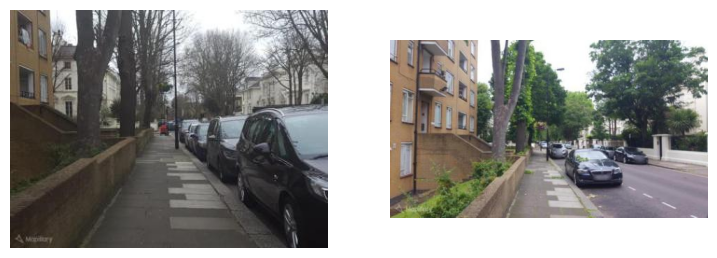

In [60]:
q = plt.imread(os.path.join('data02', q_imgs[21]))
m = plt.imread(os.path.join('data02', m_imgs[13]))

fig, ax = plt.subplots(1, 2, figsize=(9, 9))

ax[0].imshow(q)
ax[0].axis("off")

ax[1].imshow(m)
ax[1].axis("off")

plt.savefig("similar2.png")